In [7]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np

#define constant
theta  = 1.074   #1.074 is magic angle         #degree
omega  = 0.110          #mev
d      = 1.420          #angstrom, whatever is ok.
hv     = 1.5*d*2.8     #meV*angstrom, Fermi velocity for SLG
N      = 5              #truncate range
valley = -1            #+1 for K, -1 for K'


#tune parameters
theta  = theta/180.0*np.pi  
alpha  = 0.005414/np.sin(theta/2)            #obtained after computing w/(vf*k_theta)
hv1    = hv*(1-3*alpha**2)/(1+6*alpha**2)    #renormalized fermi velocity
ei120  = cos(2*pi/3) + valley*1j*sin(2*pi/3)
ei240  = cos(2*pi/3) - valley*1j*sin(2*pi/3)

ktheta = 8*np.pi*sin(theta/2)/3/sqrt(3)/d
qb     = ktheta*array([0, 1])
K1     = ktheta*array([sqrt(3)/2,0.5])    #Changed
K2     = ktheta*array([-sqrt(3)/2,0.5])

Tqb    = omega*np.array([[1,1], [1,1]], dtype=complex)
Tqtr   = omega*np.array([[ei120, 1], [ei240, ei120]], dtype=complex)
Tqtl   = omega*np.array([[ei240, 1], [ei120, ei240]], dtype=complex)
TqbD   = np.array(np.matrix(Tqb).H)
TqtrD  = np.array(np.matrix(Tqtr).H)
TqtlD  = np.array(np.matrix(Tqtl).H)


def Hamiltonian_approx(kx, ky):      #Approximation of the 8 band model with renormalized fermi velocity
    H = array(zeros((2, 2)), dtype=complex)
    H[0,1]=hv1*(valley*kx-1j*ky)
    H[1,0]=hv1*(valley*kx+1j*ky)
    
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    return eig_vals_sorted

def Hamiltonian(kx, ky):           #8 band model hamiltonian 
    H = array(zeros((8, 8)), dtype=complex)
    
    qx=kx*np.cos(theta/2)-ky*np.sin(theta/2)
    qy=kx*np.sin(theta/2)+ky*np.cos(theta/2)
    qx1=(kx+qb[0])*np.cos(theta/2)+(ky+qb[1])*np.sin(theta/2)
    qy1=-(kx+qb[0])*np.sin(theta/2)+(ky+qb[1])*np.cos(theta/2)
    qx2=(kx+K1[0])*np.cos(theta/2)+(ky+K1[1])*np.sin(theta/2)
    qy2=-(kx+K1[0])*np.sin(theta/2)+(ky+K1[1])*np.cos(theta/2)
    qx3=(kx+K2[0])*np.cos(theta/2)+(ky+K2[1])*np.sin(theta/2)
    qy3=-(kx+K2[0])*np.sin(theta/2)+(ky+K2[1])*np.cos(theta/2)
    
    H[0,1]=valley*hv*(qx+1j*qy)     
    H[1,0]=valley*hv*(qx-1j*qy)
    H[2,3]=valley*hv*(qx1+1j*qy1)
    H[3,2]=valley*hv*(qx1-1j*qy1)
    H[4,5]=valley*hv*(qx2+1j*qy2)
    H[5,4]=valley*hv*(qx2-1j*qy2)
    H[6,7]=valley*hv*(qx3+1j*qy3)
    H[7,6]=valley*hv*(qx3-1j*qy3)
    
    H[0:2,2:4]=Tqb
    H[0:2,4:6]=Tqtr
    H[0:2,6:8]=Tqtl
    H[2:4,0:2]=TqbD
    H[4:6,0:2]=TqtrD
    H[6:8,0:2]=TqtlD
    
    eigenvalue,featurevector=np.linalg.eig(H)
    eig_vals_sorted = np.sort(eigenvalue)
    return eig_vals_sorted
    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


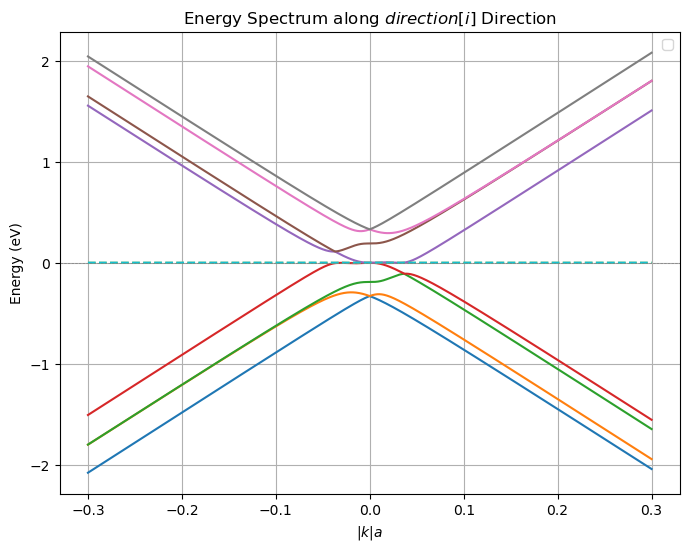

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


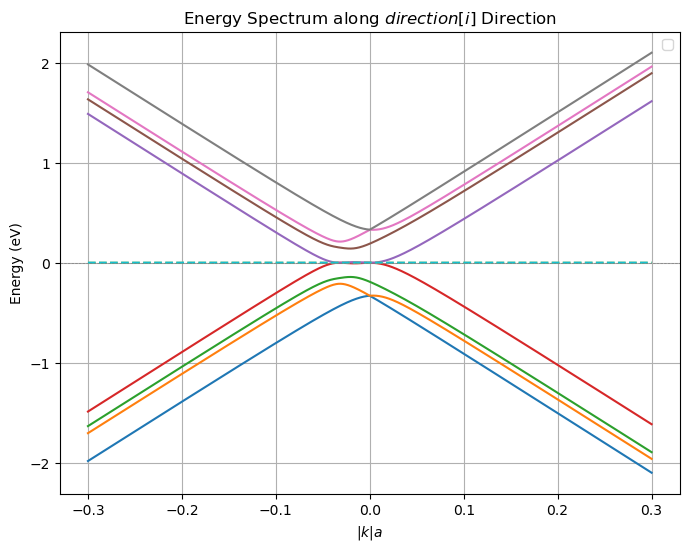

In [8]:
kx_range = np.linspace(-0.3,0.3, 1000) 
ky_range = np.linspace(-0.3,0.3, 1000)
kx0=0
ky0=0
direction=['k_x','k_y']
for i in range(2):
    if i==0:
        eigenvalues1 = []
        eigenvalues2 = []
    
        for kx in kx_range:
            eigenvalues1.append(Hamiltonian(kx, ky0))
            eigenvalues2.append(Hamiltonian_approx(kx, ky0))
    
        eigenvalues1 = np.array(eigenvalues1)
        eigenvalues2 = np.array(eigenvalues2)

        plt.figure(figsize=(8, 6))
        for band in range(eigenvalues1.shape[1]):  # Iterate over bands
            plt.plot(kx_range, eigenvalues1[:, band])
    
        for band in range(eigenvalues2.shape[1]):  # Iterate over bands
            plt.plot(kx_range, eigenvalues2[:, band],'--')
    
        plt.xlabel('$|k|a$')
        plt.ylabel('Energy (eV)')
        plt.title('Energy Spectrum along $direction[i]$ Direction')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Reference line
        plt.legend()
        plt.grid()
        plt.show()
    else:
        eigenvalues1 = []
        eigenvalues2 = []
    
        for ky in ky_range:
            eigenvalues1.append(Hamiltonian(kx0, ky))
            eigenvalues2.append(Hamiltonian_approx(kx0, ky))
    
        eigenvalues1 = np.array(eigenvalues1)
        eigenvalues2 = np.array(eigenvalues2)

        plt.figure(figsize=(8, 6))
        for band in range(eigenvalues1.shape[1]):  # Iterate over bands
            plt.plot(kx_range, eigenvalues1[:, band])
    
        for band in range(eigenvalues2.shape[1]):  # Iterate over bands
            plt.plot(kx_range, eigenvalues2[:, band],'--')
    
        plt.xlabel('$|k|a$')
        plt.ylabel('Energy (eV)')
        plt.title('Energy Spectrum along $direction[i]$ Direction')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Reference line
        plt.legend()
        plt.grid()
        plt.show()
